In [1]:
## Importing necessary libraries

import pandas as pd
import numpy as np
import random
import math
from math import floor
from random import sample
from tqdm import tqdm
import requests
import json

In [2]:
## Fetching Customer's data from database
customer_id = input("Enter Customer id")
data = requests.get('http://20.198.81.29:5000/admin/customer/' + customer_id)

data = data.json()
data

Enter Customer id 1


{'customer': {'id': 1,
  'name': 'Ajinkya Taranekar',
  'gender': 'MALE',
  'phoneNumber': '8518076044',
  'annualIncome': 100000.0,
  'aadhar': '871836501211',
  'pan': 'BSMPT6753Q',
  'electricityBill': 1996.0,
  'residenceAddress': {'firstLine': '66, Scheme No 114',
   'secondLine': 'Indore',
   'city': 'Indore',
   'state': 'Madhya Pradesh',
   'pincode': None,
   'longitude': 75.8981,
   'latitude': 22.7681},
  'aadharCardFrontImageUrl': 'https://firebasestorage.googleapis.com/v0/b/mitra-aad4b.appspot.com/o/IkQosGbzQrXVc8fQzorhvQZjIBX2%2FAadhar%2Ffdc82b09-000b-4ce5-bf8c-f001db88b1841506725469182819881.jpg?alt=media&token=80798974-35a0-4aae-94e8-600b4015720e',
  'aadharCardBackImageUrl': 'https://firebasestorage.googleapis.com/v0/b/mitra-aad4b.appspot.com/o/IkQosGbzQrXVc8fQzorhvQZjIBX2%2FAadhar%2F58e59726-faad-487a-8b64-240eb24979ab1749815431958091906.jpg?alt=media&token=5ff7f7c5-e9f1-4f9a-b6e7-764c1e008ba6',
  'panCardImageUrl': 'https://firebasestorage.googleapis.com/v0/b/mitra-a

In [3]:
customerData = {
    "customer_id" : data["customer"]["id"],
    'customer_income': data["customer"]['annualIncome'],
    'customer_electricity_bill': data["customer"]['electricityBill'],
    'residence_latitude': data["customer"]['residenceAddress']['latitude'],
    'residence_longitude': data["customer"]['residenceAddress']['longitude'],
    'customer_cibil': data['customer']['cibilScore'],
    'customer_status': data['customer']['status'],
    'customer_verified': data['customer']['verified'],
    'gurantor_income': data['instantLoanSurrogates']['guarantor']['annualIncome'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_electricity_bill': data['instantLoanSurrogates']['guarantor']['electricityBill'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_worthy': data['instantLoanSurrogates']['guarantor']['worthy'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_cibil': data['instantLoanSurrogates']['guarantor']['cibilScore'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_residence_latitude': data['instantLoanSurrogates']["guarantor"]['residenceAddress']['latitude'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_residence_longitude': data['instantLoanSurrogates']["guarantor"]['residenceAddress']['longitude'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'location_category': data['instantLoanSurrogates']['locationCategory'],
    'competition': data['instantLoanSurrogates']['competition'],
    'taxReturns': sum(i['tax'] for i in data['instantLoanSurrogates']['taxReturns']),
    'credit': sum(i['creditAmount'] for i in data['instantLoanSurrogates']['creditAmountOfShopCustomers']) if data['instantLoanSurrogates']['creditAmountOfShopCustomers'] else 0,
    'bank_account': sum(i['currentValue'] if i['currentValue'] else 0 for i in data["allBankAccounts"]),
    'shop_latitude': data["shop"]['shopAddress']['latitude'],
    'shop_longitude': data["shop"]['shopAddress']['longitude'],
    'shop_area': data["shop"]['area'],
    'shop_rating': data["shop"]['rating'],
    'shop_electricity_bill': data["shop"]['electricityAmount'],
    'shop_ownership': data["shop"]['ownership'],
    'shop_warehouse_number': data["shop"]['wareHouse']['numberOfWareHouses'],
    'shop_warehouse_area': sum(data["shop"]['wareHouse']['areaOfWareHouses']) / data["shop"]['wareHouse']['numberOfWareHouses'],
    'items': sum(product['quantity'] * product['pricePerUnit'] for product in data["shop"]['wareHouse']['itemsSet']),
    'loan_amount': data['allLoans'][-1]['demandedAmount'],
}

customerData

{'customer_id': 1,
 'customer_income': 100000.0,
 'customer_electricity_bill': 1996.0,
 'residence_latitude': 22.7681,
 'residence_longitude': 75.8981,
 'customer_cibil': None,
 'customer_status': 7,
 'customer_verified': None,
 'gurantor_income': 150.0,
 'gurantor_electricity_bill': 4500.0,
 'gurantor_worthy': None,
 'gurantor_cibil': None,
 'gurantor_residence_latitude': 22.7422,
 'gurantor_residence_longitude': 75.8947,
 'location_category': None,
 'competition': None,
 'taxReturns': 0.0,
 'credit': 0,
 'bank_account': 0,
 'shop_latitude': 22.7606,
 'shop_longitude': 75.8912,
 'shop_area': 500.0,
 'shop_rating': None,
 'shop_electricity_bill': 1996.0,
 'shop_ownership': 'PURCHASED',
 'shop_warehouse_number': 1,
 'shop_warehouse_area': 500.0,
 'items': 735750.0,
 'loan_amount': 50000.0}

In [4]:
list(customerData.keys())

['customer_id',
 'customer_income',
 'customer_electricity_bill',
 'residence_latitude',
 'residence_longitude',
 'customer_cibil',
 'customer_status',
 'customer_verified',
 'gurantor_income',
 'gurantor_electricity_bill',
 'gurantor_worthy',
 'gurantor_cibil',
 'gurantor_residence_latitude',
 'gurantor_residence_longitude',
 'location_category',
 'competition',
 'taxReturns',
 'credit',
 'bank_account',
 'shop_latitude',
 'shop_longitude',
 'shop_area',
 'shop_rating',
 'shop_electricity_bill',
 'shop_ownership',
 'shop_warehouse_number',
 'shop_warehouse_area',
 'items',
 'loan_amount']

In [5]:
list(customerData.values())

[1,
 100000.0,
 1996.0,
 22.7681,
 75.8981,
 None,
 7,
 None,
 150.0,
 4500.0,
 None,
 None,
 22.7422,
 75.8947,
 None,
 None,
 0.0,
 0,
 0,
 22.7606,
 75.8912,
 500.0,
 None,
 1996.0,
 'PURCHASED',
 1,
 500.0,
 735750.0,
 50000.0]

In [6]:
customerDf = pd.DataFrame([customerData.values()], columns=customerData.keys())
customerDf

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_latitude,shop_longitude,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount
0,1,100000.0,1996.0,22.7681,75.8981,None,7,None,150.0,4500.0,...,22.7606,75.8912,500.0,None,1996.0,PURCHASED,1,500.0,735750.0,50000.0


In [7]:
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [9]:
for i in tqdm(range(500)):
    customerDf.at[i,'customer_id'] = i+1
    customerDf.at[i,'customer_income'] = loan_data.at[i,'annual_inc']
    customerDf.at[i,'gurantor_income'] = loan_data.at[i,'annual_inc']*round(random.uniform(0, 1),4)
    customerDf.at[i,'shop_ownership'] = loan_data.at[i,'home_ownership']
    customerDf.at[i,'customer_verified'] = loan_data.at[i,'verification_status']
    customerDf.at[i,'bank_account'] = loan_data.at[i,'total_acc']*10000
    customerDf.at[i,'loan_status'] = loan_data.at[i,'loan_status']
    customerDf.at[i,'residence_latitude'] = round(random.uniform(22.614544, 22.799159),8)
    customerDf.at[i,'residence_longitude'] = round(random.uniform(75.792446, 75.941390),8)
    customerDf.at[i,'shop_latitude'] = round(random.uniform(22.614544, 22.799159),8)
    customerDf.at[i,'shop_longitude'] = round(random.uniform(75.792446, 75.941390),8)
    customerDf.at[i,'gurantor_residence_latitude'] = round(random.uniform(22.614544, 22.799159),8)
    customerDf.at[i,'gurantor_residence_longitude'] = round(random.uniform(75.792446, 75.941390),8)
    customerDf.at[i,'customer_cibil'] = int(random.uniform(100, 300))
    customerDf.at[i,'gurantor_cibil'] = int(random.uniform(100, 900))
    customerDf.at[i,'customer_status'] = 7
    customerDf.at[i,'shop_rating'] = int(random.uniform(1, 5))
    customerDf.at[i,'location_category'] = int(random.uniform(0, 2))
    customerDf.at[i,'shop_warehouse_number'] = int(random.uniform(1, 8))
    customerDf.at[i,'shop_area'] = round(random.uniform(200, 1000),2)
    customerDf.at[i,'shop_warehouse_area'] = round(random.uniform(200, 1000),2)
    customerDf.at[i,'customer_electricity_bill'] = round(random.uniform(200, 2000),2)
    customerDf.at[i,'gurantor_electricity_bill'] = round(random.uniform(200, 2000),2)
    customerDf.at[i,'shop_electricity_bill'] = round(random.uniform(200, 1000),2)
    customerDf.at[i,'items'] = round(random.uniform(100000, 1000000),2)
    customerDf.at[i,'loan_amount'] = round(random.uniform(50000, 1000000),2)
    customerDf.at[i,'credit'] = round(random.uniform(200, 1000),2)
    customerDf.at[i,'taxReturns'] = round(random.uniform(10000, 100000),2)
    customerDf.at[i,'gurantor_worthy'] = int(random.uniform(0, 1))
    
customerDf.head()

100%|██████████| 500/500 [00:00<00:00, 572.83it/s]


,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_longitude,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status
0,1.0,117000.0,1779.48,22.651386,75.861245,266,7.0,Not Verified,98455.5000,404.44,...,75.886963,903.21,2,525.22,RENT,1.0,649.60,951856.27,376264.54,Fully Paid
1,2.0,65000.0,1399.53,22.688499,75.912144,102,7.0,Not Verified,38545.0000,1085.30,...,75.796489,845.22,3,939.58,MORTGAGE,2.0,230.57,268109.36,275602.30,Fully Paid
2,3.0,43057.0,855.93,22.629529,75.857738,286,7.0,Source Verified,31405.7758,301.80,...,75.877167,436.50,3,626.46,RENT,2.0,504.49,560159.30,519305.49,Fully Paid
3,4.0,54000.0,1055.49,22.635889,75.884870,230,7.0,Not Verified,46909.8000,1954.21,...,75.877845,761.69,4,944.52,RENT,2.0,903.83,159622.80,127947.21,Fully Paid
4,5.0,55000.0,1464.95,22.676509,75.894756,152,7.0,Verified,43631.5000,1921.24,...,75.840766,231.28,3,925.15,MORTGAGE,3.0,823.03,247764.05,371291.82,Charged Off


In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customerDf['customer_verified'] = labelencoder.fit_transform(customerDf['customer_verified'])
customerDf['shop_ownership'] = labelencoder.fit_transform(customerDf['shop_ownership'])
customerDf['loan_status'] = labelencoder.fit_transform(customerDf['loan_status'])

customerDf

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_longitude,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status
0,1.0,117000.0,1779.48,22.651386,75.861245,266,7.0,0,98455.5000,404.44,...,75.886963,903.21,2,525.22,2,1.0,649.60,951856.27,376264.54,1
1,2.0,65000.0,1399.53,22.688499,75.912144,102,7.0,0,38545.0000,1085.30,...,75.796489,845.22,3,939.58,0,2.0,230.57,268109.36,275602.30,1
2,3.0,43057.0,855.93,22.629529,75.857738,286,7.0,1,31405.7758,301.80,...,75.877167,436.50,3,626.46,2,2.0,504.49,560159.30,519305.49,1
3,4.0,54000.0,1055.49,22.635889,75.884870,230,7.0,0,46909.8000,1954.21,...,75.877845,761.69,4,944.52,2,2.0,903.83,159622.80,127947.21,1
4,5.0,55000.0,1464.95,22.676509,75.894756,152,7.0,2,43631.5000,1921.24,...,75.840766,231.28,3,925.15,0,3.0,823.03,247764.05,371291.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496.0,65000.0,365.08,22.789301,75.877284,131,7.0,2,12902.5000,1367.43,...,75.814026,806.83,2,344.29,2,4.0,736.21,120466.12,856349.57,1
496,497.0,68000.0,731.36,22.797728,75.838351,273,7.0,0,37658.4000,401.54,...,75.798638,269.54,3,400.04,2,1.0,433.88,639940.31,354375.82,1
497,498.0,61000.0,1472.19,22.668591,75.819307,206,7.0,2,58883.3000,673.28,...,75.933831,409.18,1,829.02,0,1.0,984.56,601891.09,461917.75,1
498,499.0,42000.0,592.74,22.674842,75.844746,163,7.0,0,26098.8000,1813.25,...,75.823307,453.69,3,380.96,0,5.0,352.77,885032.25,196756.41,1


In [11]:
customerDf = customerDf.fillna(0)
customerDf

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_longitude,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status
0,1.0,117000.0,1779.48,22.651386,75.861245,266,7.0,0,98455.5000,404.44,...,75.886963,903.21,2,525.22,2,1.0,649.60,951856.27,376264.54,1
1,2.0,65000.0,1399.53,22.688499,75.912144,102,7.0,0,38545.0000,1085.30,...,75.796489,845.22,3,939.58,0,2.0,230.57,268109.36,275602.30,1
2,3.0,43057.0,855.93,22.629529,75.857738,286,7.0,1,31405.7758,301.80,...,75.877167,436.50,3,626.46,2,2.0,504.49,560159.30,519305.49,1
3,4.0,54000.0,1055.49,22.635889,75.884870,230,7.0,0,46909.8000,1954.21,...,75.877845,761.69,4,944.52,2,2.0,903.83,159622.80,127947.21,1
4,5.0,55000.0,1464.95,22.676509,75.894756,152,7.0,2,43631.5000,1921.24,...,75.840766,231.28,3,925.15,0,3.0,823.03,247764.05,371291.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496.0,65000.0,365.08,22.789301,75.877284,131,7.0,2,12902.5000,1367.43,...,75.814026,806.83,2,344.29,2,4.0,736.21,120466.12,856349.57,1
496,497.0,68000.0,731.36,22.797728,75.838351,273,7.0,0,37658.4000,401.54,...,75.798638,269.54,3,400.04,2,1.0,433.88,639940.31,354375.82,1
497,498.0,61000.0,1472.19,22.668591,75.819307,206,7.0,2,58883.3000,673.28,...,75.933831,409.18,1,829.02,0,1.0,984.56,601891.09,461917.75,1
498,499.0,42000.0,592.74,22.674842,75.844746,163,7.0,0,26098.8000,1813.25,...,75.823307,453.69,3,380.96,0,5.0,352.77,885032.25,196756.41,1


In [12]:
for i in customerDf.columns:
    customerDf[i] = customerDf[i].apply(np.int64) 
customerDf

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_longitude,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status
0,1,117000,1779,22,75,266,7,0,98455,404,...,75,903,2,525,2,1,649,951856,376264,1
1,2,65000,1399,22,75,102,7,0,38545,1085,...,75,845,3,939,0,2,230,268109,275602,1
2,3,43057,855,22,75,286,7,1,31405,301,...,75,436,3,626,2,2,504,560159,519305,1
3,4,54000,1055,22,75,230,7,0,46909,1954,...,75,761,4,944,2,2,903,159622,127947,1
4,5,55000,1464,22,75,152,7,2,43631,1921,...,75,231,3,925,0,3,823,247764,371291,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,65000,365,22,75,131,7,2,12902,1367,...,75,806,2,344,2,4,736,120466,856349,1
496,497,68000,731,22,75,273,7,0,37658,401,...,75,269,3,400,2,1,433,639940,354375,1
497,498,61000,1472,22,75,206,7,2,58883,673,...,75,409,1,829,0,1,984,601891,461917,1
498,499,42000,592,22,75,163,7,0,26098,1813,...,75,453,3,380,0,5,352,885032,196756,1


In [13]:
X = customerDf.drop("loan_amount",axis=1)
y = customerDf["loan_amount"]

In [14]:
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score, GridSearchCV

In [15]:
# from sklearn.preprocessing import PolynomialFeatures
# X = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)
# X

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.33, shuffle = True,
                                                   random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((165, 29), (335, 29), (165,), (335,))

In [17]:
X_train.head()

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_latitude,shop_longitude,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_status
125,126,70000,924,22,75,238,7,2,18249,1985,...,22,75,392,4,312,2,3,667,126687,1
280,281,50000,463,22,75,197,7,1,29245,1519,...,22,75,558,2,905,2,2,593,911353,1
286,287,495000,469,22,75,114,7,1,486832,1767,...,22,75,759,4,816,1,5,930,197675,1
77,78,135000,1121,22,75,217,7,2,6169,1093,...,22,75,356,1,916,2,3,926,960838,1
184,185,62000,1900,22,75,190,7,2,59836,1365,...,22,75,914,3,558,2,1,268,591790,1


In [18]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_pred


array([558831.51259924, 667079.41786369, 489977.92089553, 572147.23864988,
       468988.84787337, 524371.52321857, 473277.97821509, 573916.70587756,
       570265.29157255, 547226.17364035, 417268.53599537, 497613.55375915,
       625416.83748334, 333032.44913556, 283617.45977823, 501258.25619321,
       289282.28284443, 461769.30178852, 434786.84070752, 358840.83500853,
       595739.28929299, 318400.24544338, 591496.70570898, 457387.55710559,
       507893.00945595, 450167.8497873 , 419662.61353022, 593914.6703829 ,
       413877.57984313, 511329.04971953, 408610.32409583, 415799.41577982,
       419011.0493313 , 311264.78782837, 631820.45695452, 514682.83490055,
       541517.75338641, 496932.67689043, 283521.64528012, 331715.65064669,
       520166.03628702, 492723.07045472, 502524.14120271, 662519.17580029,
       355308.41878732, 414913.56919126, 522812.91213008, 510941.7052094 ,
       681313.67499331, 617560.44264864, 602456.53118164, 478216.26547499,
       523578.52487752, 3

In [19]:
import pickle
pickle.dump(linreg, open('model.sav', 'wb'))

In [20]:
y_test

90     977200
254    517632
283    665498
445    643360
461     72205
        ...  
269    987779
226     95441
414    848007
3      127947
378    474632
Name: loan_amount, Length: 335, dtype: int64

In [21]:
result = pd.DataFrame()
pd.set_option('display.float_format', '{:.2f}'.format)
result['actual_loan_amount'] = y_test
result['predicted_loan_amount'] = y_pred
result = result.sort_index(axis = 0) 
result

,actual_loan_amount,predicted_loan_amount
1,275602,414913.57
2,519305,451829.71
3,127947,510951.41
4,371291,250501.76
5,705083,588225.47
...,...,...
494,778495,412261.05
495,856349,653912.33
496,354375,456412.51
497,461917,468312.08


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

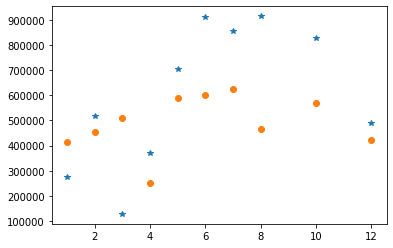

In [23]:
plt.plot(result['actual_loan_amount'][:10], '*')
plt.plot(result['predicted_loan_amount'][:10], 'o')

plt.show()

In [24]:
print(linreg.score(X_test, y_test)) 

-0.1392632585656759


In [25]:
linreg.intercept_

249835.23484693406

In [26]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [27]:
y_pred = regressor.predict(X_test)
y_pred = [int(i) for i in y_pred]
y_pred

[785513,
 639659,
 902091,
 256065,
 562324,
 409995,
 572137,
 213154,
 456688,
 136650,
 163639,
 383958,
 600599,
 391175,
 403273,
 461521,
 894981,
 390090,
 221664,
 221664,
 978021,
 555424,
 256065,
 221664,
 191881,
 894981,
 221664,
 350028,
 66219,
 350028,
 978021,
 432335,
 309800,
 221664,
 256065,
 403273,
 572137,
 364138,
 210534,
 456688,
 210534,
 894981,
 221664,
 602238,
 432335,
 978021,
 591883,
 390090,
 299264,
 391175,
 503024,
 221664,
 894981,
 309800,
 744090,
 600599,
 591883,
 790148,
 894981,
 341299,
 390090,
 221664,
 258779,
 213154,
 130123,
 790148,
 889823,
 263315,
 350028,
 894981,
 364138,
 894981,
 572137,
 299264,
 572137,
 894981,
 894981,
 555424,
 398393,
 258779,
 894981,
 221664,
 894981,
 390090,
 785513,
 894981,
 889823,
 221664,
 572137,
 894981,
 894981,
 120602,
 213154,
 902091,
 111623,
 299264,
 210534,
 572137,
 456688,
 130123,
 383958,
 775230,
 744090,
 513065,
 146590,
 263315,
 562324,
 359661,
 555424,
 639659,
 555424,
 4

In [28]:
result = pd.DataFrame()
pd.set_option('display.float_format', '{:.2f}'.format)
result['actual_loan_amount'] = y_test
result['predicted_loan_amount'] = y_pred
result = result.sort_index(axis = 0) 
result

,actual_loan_amount,predicted_loan_amount
1,275602,978021
2,519305,350028
3,127947,894981
4,371291,847917
5,705083,398393
...,...,...
494,778495,894981
495,856349,513065
496,354375,390090
497,461917,600599


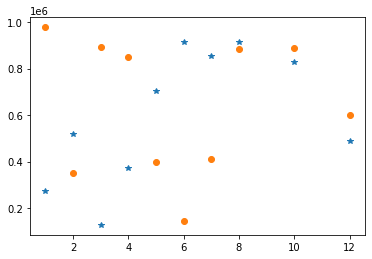

In [29]:
plt.plot(result['actual_loan_amount'][:10], '*')
plt.plot(result['predicted_loan_amount'][:10], 'o')

plt.show()

In [30]:
import pickle
pickle.dump(regressor, open('model.sav', 'wb'))

In [32]:
customerDf.to_csv('data.csv')